#                                            Yangzhou University
##                                                Software Data Analysis 2022
###                                                                鲁卡娅+ MH20055

### Random Forest Classifier(Wine quality testing)
dataset link : https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("winequality-red.csv",sep=";")

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.duplicated().sum()

240

In [8]:
df = df.drop_duplicates()

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### so this is  a normal distribution as 3 and 8 have less values ans 5,6, 7 are values for middel 

([<matplotlib.patches.Wedge at 0x2799ead14c0>,
 [Text(0.25821137483255596, 1.0692646472726393, '5'),
  Text(-0.7951496098451692, -0.7600901906767876, '6'),
  Text(0.800401816489204, -0.754557441259963, '7'),
  Text(1.0665207655922797, -0.26932036046399827, '4'),
  Text(1.095978743575482, -0.09397123831634843, '8'),
  Text(1.0997060979325133, -0.0254263282847884, '3')])

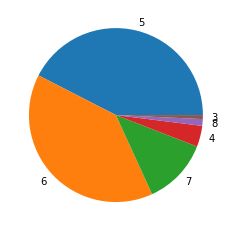

In [15]:
quality_values=df.quality.value_counts().index
quality_count=df.quality.value_counts().values

plt.pie(quality_count,labels=quality_values)


In [16]:
df.corr().quality


fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

#### the big numbers are volatile acidity (-0.395214), alcohol(0.480343) and quality is the Y means target here. so , volatile acidity has a negative high correlation and alcohol has a positive high correlation.

### base on correlation ,let's see the behaviour with quality among alchohol and volatile acidity

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

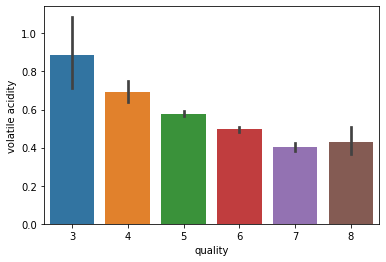

In [17]:
sns.barplot(x='quality',y='volatile acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

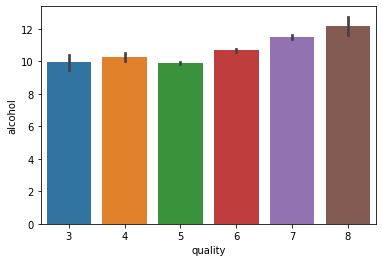

In [18]:
sns.barplot(x='quality',y='alcohol',data=df)

#### by analysis these two bar plot , we can say quality improves with the rising amount of alcohol and decreases with the increase of volatile aciidity

### Labeling the qualtity data a three groups for improvement of our machine learning model 

In [19]:
from sklearn.preprocessing import LabelEncoder


In [20]:
bins=(2,4,6,8)
group_names =['low','medium','high']
df['quality']=pd.cut(df['quality'],bins= bins,labels= group_names)

C:\Users\Rukaia\AppData\Local\Temp/ipykernel_3172/3421135216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality']=pd.cut(df['quality'],bins= bins,labels= group_names)


In [21]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,medium
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,medium
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,medium
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,medium
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,medium
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,medium
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,medium


In [22]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [23]:
df["quality"]= label_encoder.fit_transform(df["quality"])

C:\Users\Rukaia\AppData\Local\Temp/ipykernel_3172/3683477494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["quality"]= label_encoder.fit_transform(df["quality"])


In [24]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,2
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [25]:
df["quality"].value_counts()

2    1112
0     184
1      63
Name: quality, dtype: int64

#### 2 is for medium, 1 is for low and 0 is for high 

C:\Users\Rukaia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

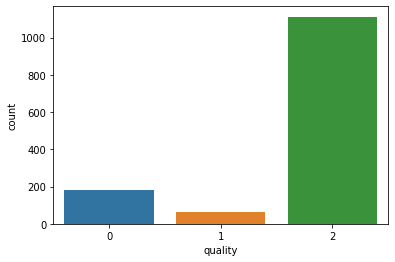

In [26]:
sns.countplot(df["quality"])

#### spliting the dataset , X as independent features  and y dependent feature

In [27]:
X= df.iloc[:,:-1]
### X =df.drop(df["quality"])
y = df["quality"]


### spliting the data set into test and train to fit into a ML model

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [30]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1492,6.2,0.650,0.06,1.6,0.050,6.0,18.0,0.99348,3.57,0.54,11.95
958,6.4,0.570,0.12,2.3,0.120,25.0,36.0,0.99519,3.47,0.71,11.30
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.80
54,7.6,0.510,0.15,2.8,0.110,33.0,73.0,0.99550,3.17,0.63,10.20
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.80
...,...,...,...,...,...,...,...,...,...,...,...
1000,7.5,0.430,0.30,2.2,0.062,6.0,12.0,0.99495,3.44,0.72,11.50
255,8.0,0.570,0.23,3.2,0.073,17.0,119.0,0.99675,3.26,0.57,9.30
1445,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,9.60
1454,11.7,0.450,0.63,2.2,0.073,7.0,23.0,0.99974,3.21,0.69,10.90


### scaling the data 
#### for useing machine learnign model ,we need to normalize the data, here scale() is used to standardized 
#### before scalling we should split the dataset 

In [31]:
from sklearn.preprocessing import scale 

In [32]:
X_train=scale(X_train)
X_test=scale(X_test)

### Implementing Random forest classifier 

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc= RandomForestClassifier(n_estimators=200)

In [35]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [36]:
pred_rfc=rfc.predict(X_test)

### Checking the accurecy by Classification report and confusion matrix

In [37]:
from sklearn.metrics import classification_report

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
classification_report(y_test,pred_rfc)

C:\Users\Rukaia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rukaia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rukaia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

'              precision    recall  f1-score   support\n\n           0       0.25      0.18      0.21        28\n           1       0.00      0.00      0.00        15\n           2       0.85      0.93      0.89       229\n\n    accuracy                           0.81       272\n   macro avg       0.37      0.37      0.37       272\nweighted avg       0.74      0.81      0.77       272\n'

In [40]:
confusion_matrix(y_test,pred_rfc)

array([[  5,   0,  23],
       [  0,   0,  15],
       [ 15,   0, 214]], dtype=int64)

### Model report 
### By the confusion matrix, the accurate values are shaped in diagonally. so among the 28 values for 0 means medium quality wine our model predicted 5 samples correctly,with 17% accuracy. The 15 values for 1 means low quality wine our model predicted 15 samples correctly,with 100% accuracy.The 229 values for 2 means high quality wine our model predicted 214 samples correctly,with 93.44% accuracy
